In [1]:
import numpy as np
import pandas as pd

from scipy.io import loadmat
from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = loadmat('../input/andrew_ng/ex5data1.mat')
data.keys()

dict_keys(['__globals__', 'Xtest', 'y', 'ytest', 'Xval', 'yval', 'X', '__header__', '__version__'])

In [3]:
X, y, Xval, yval, Xtest, ytest = data['X'], data['y'], data['Xval'], data['yval'], data['Xtest'], data['ytest']
X.shape, y.shape, Xval.shape, yval.shape, Xtest.shape, ytest.shape

((12, 1), (12, 1), (21, 1), (21, 1), (21, 1), (21, 1))

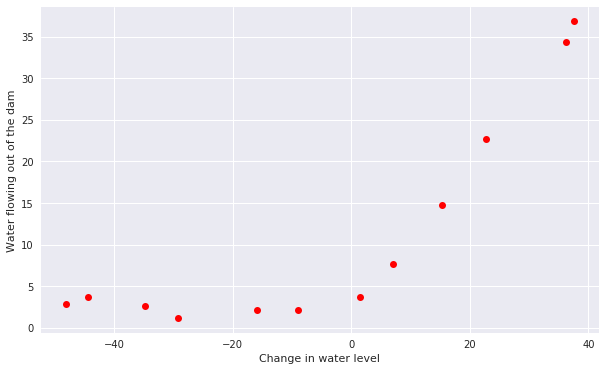

In [4]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'ro')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam');

In [5]:
def cost_reg(theta, X, y, reg):
    theta = theta.reshape(1, -1)
    m = y.size
    hx = X.dot(theta.T)
    a = np.sum(np.square(hx-y))
    b = theta[0,0]
    c = reg*np.sum(np.square(theta[1:]))
    return ( a + b + c)/(2*m)

X_new = np.c_[np.ones(X.shape[0]), X]  # add ones
theta = np.ones((X_new.shape[1],1))

cost_reg(theta, X_new, y, 0)

303.9931922202643

In [6]:
def gradient_reg(theta, X, y, reg):
    m = y.size
    theta = theta.reshape(-1, 1)
    hx = X.dot(theta)
    grad = X.T.dot(hx-y)/m + np.concatenate((theta[:1], theta[1:]*reg))/m
    return grad.ravel()

grad = gradient_reg(theta, X_new, y, 0)
grad

array([-15.21968234, 598.16741084])

In [7]:
def opt_theta(theta, X_new, y, reg):
    return minimize(cost_reg, theta, args=(X_new, y, reg), jac=gradient_reg, options={'maxiter':3000})

res = opt_theta(theta, X_new, y, 1)

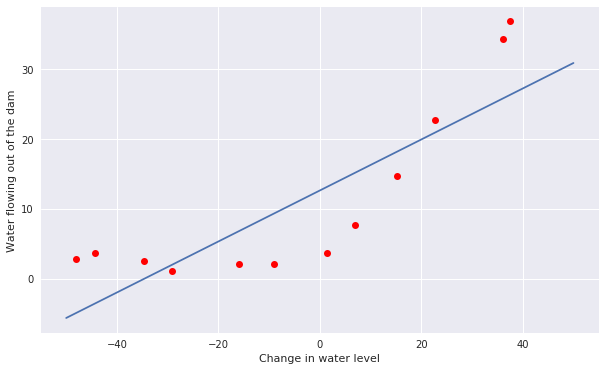

In [8]:
xx = np.c_[np.ones((100,1)), np.linspace(-50, 50, 100).reshape(100,1)]
grad_opt = res.x.reshape(-1, 1)
yy = xx.dot(grad_opt)

plt.figure(figsize=(10,6))
plt.plot(X, y, 'ro')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.plot(xx[:,1], yy);

In [9]:
def learning_curve(X,y, Xval, yval):
    Xval = np.c_[np.ones(Xval.shape[0]), Xval]
    m = y.size
    train_err = np.zeros(m)
    val_err = np.zeros(m)
    reg = 0  # we will take reg 0 here
    for i in range(1, m):
        resp = opt_theta(theta, X[:i,:], y[:i,:], reg)  # optimise
        train_err[i] = resp.fun
        val_err[i] = cost_reg(resp.x, Xval, yval, 1)  # for entire cross val set
    return train_err, val_err

train_err, val_err = learning_curve(X_new,y, Xval, yval)

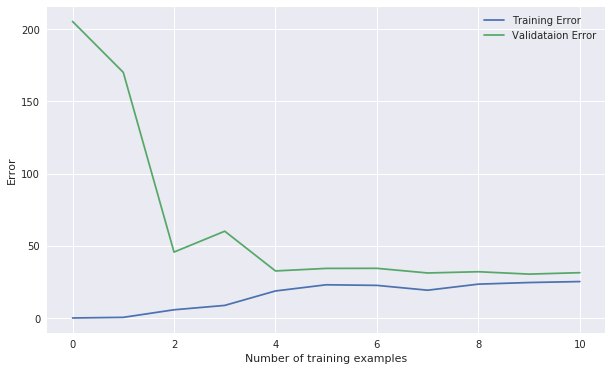

In [10]:
plt.figure(figsize=(10,6))
plt.plot(train_err[1:], label='Training Error')
plt.plot(val_err[1:], label='Validataion Error')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend();

In [11]:
poly = PolynomialFeatures(8)
X_poly = poly.fit_transform(X)
X_poly.shape

(12, 9)

In [12]:
# initialize theta
theta_poly = np.ones((X_poly.shape[1], 1))
theta_poly.shape

(9, 1)

In [13]:
resp = opt_theta(theta_poly, X_poly, y, 0)

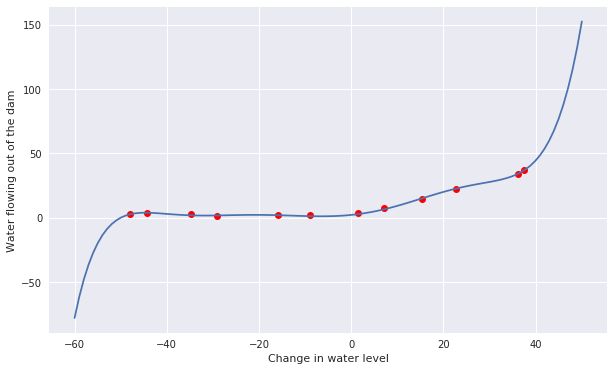

In [14]:
xx = PolynomialFeatures(8).fit_transform(np.linspace(-60, 50, 110).reshape(110,1))
grad = resp.x.reshape(-1, 1)
yy = xx.dot(grad)

plt.figure(figsize=(10,6))
plt.plot(X, y, 'ro')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.plot(xx[:,1], yy);